In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 145.4 MB/s eta 0:00:09tcmalloc: large alloc 1147494400 bytes == 0x55edbef34000 @  0x7f28b122d615 0x55ed84f1e17c 0x55ed84ffe47a 0x55ed84f20f9d 0x55ed85012d4d 0x55ed84f94ec8 0x55ed84f8fa2e 0x55ed84f2288a 0x55ed84f94d30 0x55ed84f8fa2e 0x55ed84f2288a 0x55ed84f91719 0x55ed85013b76 0x55ed84f90d95 0x55ed85013b76 0x55ed84f90d95 0x55ed85013b76 0x55ed84f90d95 0x55ed84f22ce9 0x55ed84f66579 0x55ed84f21902 0x55ed84f94c4d 0x55ed84f8fa2e 0x55ed84f2288a 0x55ed84f91719 0x55ed84f8fa2e 0x55ed84f2288a 0x55ed84f908f6 0x55ed84f227aa 0x55ed84f90b4f 0x55ed84f8fa2e
     |████████████████▌               | 1055.7 MB 1.2 MB/s eta 0:13:53tcmalloc: large alloc 1434370048 bytes == 0x55ee0358a000 @  0x7f28b122d615 0x55ed84f1e17c 0x55ed84ffe47a 0x55ed84f20f9d 0x55ed85012d4d 0x55ed84f94ec8 0x55ed84f8fa2e 0x55ed84f2288a 0x55ed84f94d30 0x55ed84f8fa2e 0x55ed84f2288a 0x55ed84f91719 0x55ed85013b76 0x55ed84f9

In [17]:
from mmcv import collect_env
collect_env()

{'CUDA available': True,
 'CUDA_HOME': '/usr/local/cuda',
 'GCC': 'x86_64-linux-gnu-gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0',
 'GPU 0': 'Tesla P100-PCIE-16GB',
 'MMCV': '1.5.0',
 'MMCV CUDA Compiler': '11.1',
 'MMCV Compiler': 'GCC 7.3',
 'NVCC': 'Cuda compilation tools, release 11.1, V11.1.105',
 'OpenCV': '4.1.2',
 'PyTorch': '1.9.0+cu111',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.1\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-genco

In [18]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu111 True
2.23.0
11.1
GCC 7.3


In [26]:
%cd ..
%cd .. 

/content
/


In [6]:
!mkdir content/mmdetection/kitti

In [7]:
!cp -a content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/kitti/* content/mmdetection/kitti

In [8]:
!cp content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/kitti/config/coco_detection_base_kitti.py content/mmdetection/configs/_base_/datasets

In [9]:
!cp content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/kitti/config/faster_rcnn_r50_fpn_1x_coco_base_kitti.py content/mmdetection/configs/faster_rcnn

In [10]:
!cp content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/kitti/config/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco_base_kitti.py content/mmdetection/configs/faster_rcnn

In [11]:
!cp content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/kitti/config/kitti.py content/mmdetection/mmdet/datasets/

In [27]:
!cp content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/kitti/config/__init__.py content/mmdetection/mmdet/datasets/

In [13]:
%pwd

'/'

In [28]:
%cd content/mmdetection/kitti

/content/mmdetection/kitti


In [15]:
with open('train.txt', 'w') as f:
  training_data = list(range(5500))
  training_data = [str(inte).zfill(6) for inte in training_data]
  f.write('\n'.join(training_data))
  
with open('val.txt', 'w') as f:
  training_data = list(range(5500, 6500))
  training_data = [str(inte).zfill(6) for inte in training_data]
  f.write('\n'.join(training_data))
  
with open('test.txt', 'w') as f:
  training_data = list(range(6500, 7481))
  training_data = [str(inte).zfill(6) for inte in training_data]
  f.write('\n'.join(training_data))

In [29]:
%cd ..

/content/mmdetection


In [37]:
import copy
import os.path as osp

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

@DATASETS.register_module()
class KittiDataset(CustomDataset):

    CLASSES = ('Car', 'Van', 'Truck', 'Pedestrian', 'Person_sitting', 'Cyclist', 
                'Tram', 'Misc')

    def load_annotations(self, ann_file):
        cat2label = {k: i for i, k in enumerate(self.CLASSES)}
        # load image list from file
        image_list = mmcv.list_from_file(self.ann_file)
    
        data_infos = []
        # convert annotations to middle format
        for image_id in image_list:
            filename = f'{self.img_prefix}/{image_id}.png'
            image = mmcv.imread(filename)
            height, width = image.shape[:2]
    
            data_info = dict(filename=f'{image_id}.png', width=width, height=height)
    
            # load annotations
            label_prefix = self.img_prefix.replace('image_2', 'label_2')
            lines = mmcv.list_from_file(osp.join(label_prefix, f'{image_id}.txt'))
    
            content = [line.strip().split(' ') for line in lines]
            bbox_names = [x[0] for x in content]
            bboxes = [[float(info) for info in x[4:8]] for x in content]
    
            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []
    
            # filter 'DontCare'
            for bbox_name, bbox in zip(bbox_names, bboxes):
                if bbox_name in cat2label:
                    gt_labels.append(cat2label[bbox_name])
                    gt_bboxes.append(bbox)
                else:
                    gt_labels_ignore.append(-1)
                    gt_bboxes_ignore.append(bbox)

            data_anno = dict(
                bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                labels=np.array(gt_labels, dtype=np.long),
                bboxes_ignore=np.array(gt_bboxes_ignore,
                                       dtype=np.float32).reshape(-1, 4),
                labels_ignore=np.array(gt_labels_ignore, dtype=np.long))

            data_info.update(ann=data_anno)
            data_infos.append(data_info)

        return data_infos

KeyError: ignored

In [34]:
from mmcv import Config
cfg = Config.fromfile('configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco_base_kitti.py')


In [35]:
print(cfg.dataset_type)
print(cfg.data_root)
print(cfg.data.test.type)
#print(cfg.data.test.data_root)
print(cfg.data.test.ann_file)
print(cfg.data.test.img_prefix)
# cfg.data.test.ann_file = 'data/coco/instances_test2017.json'
# cfg.data.test.img_prefix = 'data/coco/test/'

KittiDataset
kitti/
KittiDataset
kitti/test.txt
kitti/training/image_2


In [17]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'KittiDataset'
cfg.data_root = 'kitti/'

cfg.data.test.type = 'KittiDataset'
cfg.data.test.data_root = 'kitti/'
cfg.data.test.ann_file = 'test.txt'
cfg.data.test.img_prefix = 'training/image_2'

cfg.data.train.type = 'KittiDataset'
cfg.data.train.data_root = 'kitti/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'training/image_2'

cfg.data.val.type = 'KittiDataset'
cfg.data.val.data_root = 'kitti/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'training/image_2'

# modify num classes of the model in box head
# cfg.model.roi_head.bbox_head.num_classes = 3
cfg.model.roi_head.bbox_head.num_classes = 8
# If we need to finetune a model based on a pre-trained detector, we need to
# # use load_from to set the path of checkpoints.
# cfg.load_from = 'checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = 'linear'
cfg.log_config.interval = 50

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe',
        init_cfg=dict(
            type='Pretrained',
            checkpoint='open-mmlab://detectron2/resnet50_caffe')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='Cro

In [51]:
%pwd

'/'

In [18]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector


# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int`

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1000/1000, 17.9 task/s, elapsed: 56s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-04-24 02:13:19,411 - mmdet - INFO - 
+----------------+------+-------+--------+-------+
| class          | gts  | dets  | recall | ap    |
+----------------+------+-------+--------+-------+
| Car            | 3911 | 14768 | 0.952  | 0.898 |
| Van            | 367  | 3326  | 0.940  | 0.832 |
| Truck          | 146  | 942   | 0.938  | 0.884 |
| Pedestrian     | 618  | 5366  | 0.798  | 0.579 |
| Person_sitting | 24   | 363   | 0.625  | 0.356 |
| Cyclist        | 223  | 1889  | 0.852  | 0.633 |
| Tram           | 67   | 451   | 0.940  | 0.718 |
| Misc           | 128  | 1365  | 0.781  | 0.622 |
+----------------+------+-------+--------+-------+
| mAP            |      |       |        | 0.690 |
+----------------+------+-------+--------+-------+
2022-04-24 02:13:19,421 - mmdet - INFO - Epoch(val) [12][1000]	AP50: 0.6900, mAP: 0.6903


In [19]:
%cd ..
%cd ..

/content
/


In [20]:
# !cp content/mmdetection/tutorial_exps/epoch_12.pth content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/kitti/checkpoints/ 

cp: cannot stat 'content/mmdetection/tutorial_exps/epoch_12.pth': No such file or directory


In [21]:
!mkdir content/mmdetection/checkpoints

In [22]:
!cp content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/kitti/checkpoints/epoch_12.pth content/mmdetection/checkpoints

In [23]:
%cd content/mmdetection

/content/mmdetection


In [30]:
!python tools/test.py configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco_base_kitti.py checkpoints/epoch_12.pth --show

/content/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
load checkpoint from local path: checkpoints/epoch_12.pth
The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([9, 1024]) from checkpoint, the shape in current model is torch.Size([81, 1024]).
size mismatch for roi_head.bbox_head

In [32]:
import os
import os.path as osp
import mmcv
import numpy as np
import pickle

if __name__ == "__main__":
    CLASSES = ('Car', 'Van', 'Truck', 'Pedestrian', 'Person_sitting', 'Cyclist', 
                'Tram', 'Misc')
    cat2label = {k: i for i, k in enumerate(CLASSES)}
    image_list = mmcv.list_from_file("kitti/train.txt")
    data_infos = []
    for image_id in image_list:
            filename = osp.join("kitti/training/image_2", image_id+".png")
            image = mmcv.imread(filename)
            height, width = image.shape[:2]

            data_info = dict(filename=f'{image_id}.jpeg', width=width, height=height)

            # load annotations
            lines = mmcv.list_from_file(osp.join("kitti/training/label_2", f'{image_id}.txt'))

            content = [line.strip().split(' ') for line in lines]
            bbox_names = [x[0] for x in content]
            bboxes = [[float(info) for info in x[4:8]] for x in content]

            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []

            # filter 'DontCare'
            for bbox_name, bbox in zip(bbox_names, bboxes):
                if bbox_name in cat2label:
                    gt_labels.append(cat2label[bbox_name])
                    gt_bboxes.append(bbox)
                else:
                    gt_labels_ignore.append(-1)
                    gt_bboxes_ignore.append(bbox)

            data_anno = dict(
                bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                labels=np.array(gt_labels, dtype=np.long),
                bboxes_ignore=np.array(gt_bboxes_ignore,
                                       dtype=np.float32).reshape(-1, 4),
                labels_ignore=np.array(gt_labels_ignore, dtype=np.long))

            data_info.update(ann=data_anno)
            data_infos.append(data_info)
    with open("kitti.pkl", 'wb') as f:
        pickle.dump(data_infos, f)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int`

In [33]:
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

# Choose to use a config and initialize the detector
config = 'configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco_base_kitti.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/epoch_12.pth'

# Set the device to be used for evaluation
device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

load checkpoint from local path: checkpoints/epoch_12.pth
The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([9, 1024]) from checkpoint, the shape in current model is torch.Size([81, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([9]) from checkpoint, the shape in current model is torch.Size([81]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([32, 1024]) from checkpoint, the shape in current model is torch.Size([320, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([320]).


FasterRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

In [48]:
# Use the detector to do inference
img = 'kitti/training/image_2/005000.png'
result = inference_detector(model, img)

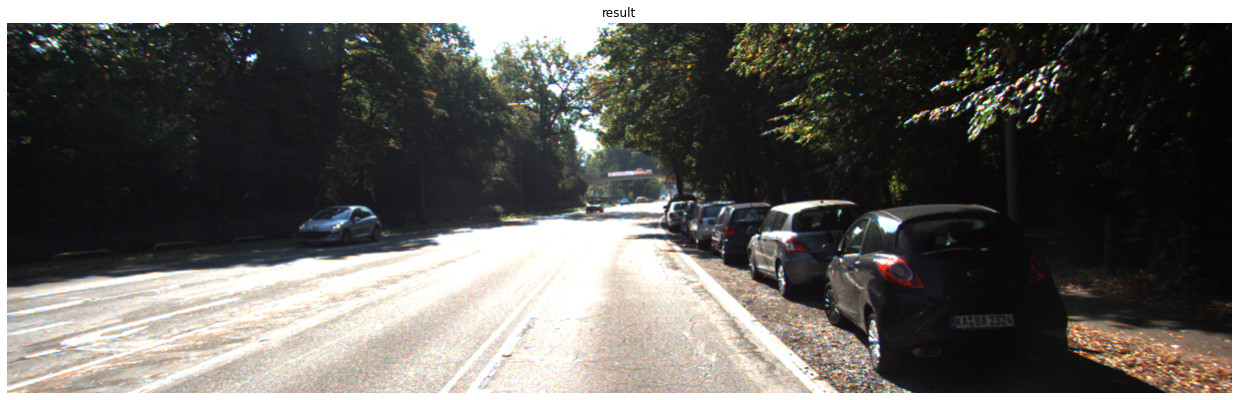

In [49]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)